In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('D:\Datasets\Telco-Customer-Churn.csv')
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [4]:
def class_distribution(xVal, data):
    sns.countplot(x=df[xVal], data=df)
    plt.show()

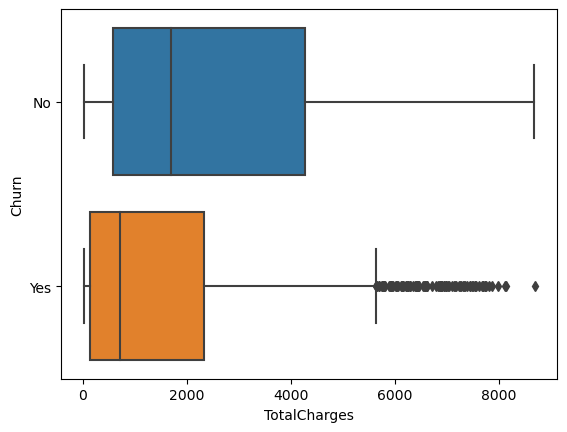

In [5]:
sns.boxplot(data=df, x='TotalCharges', y='Churn')
plt.show()

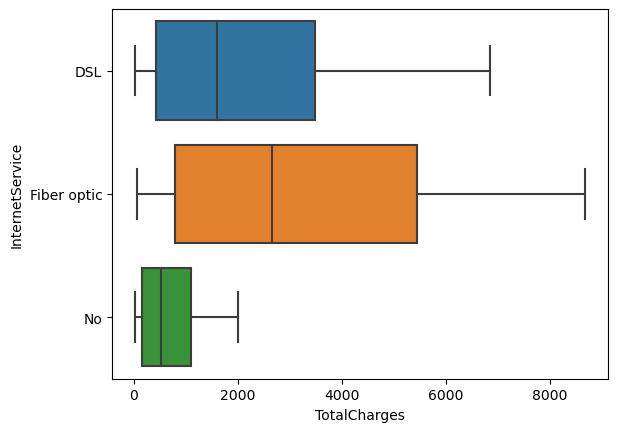

In [6]:
sns.boxplot(data=df, x='TotalCharges', y='InternetService')
plt.show()

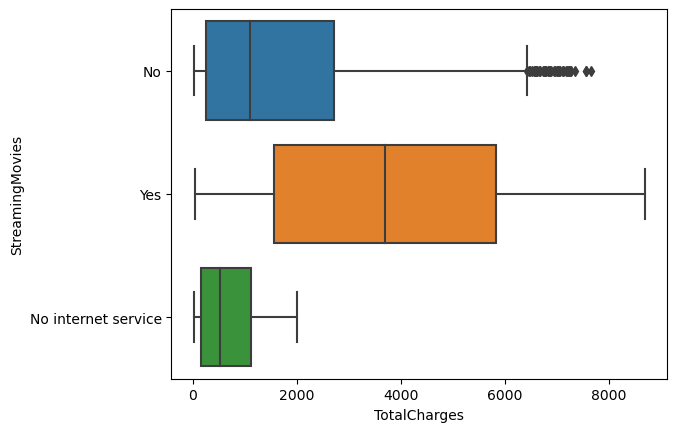

In [7]:
sns.boxplot(data=df, x='TotalCharges', y='StreamingMovies')
plt.show()

##### It can be observe from the above visulization that people who are paying more means using more services and intresting fact is that people those who are using less services their retentation is low.

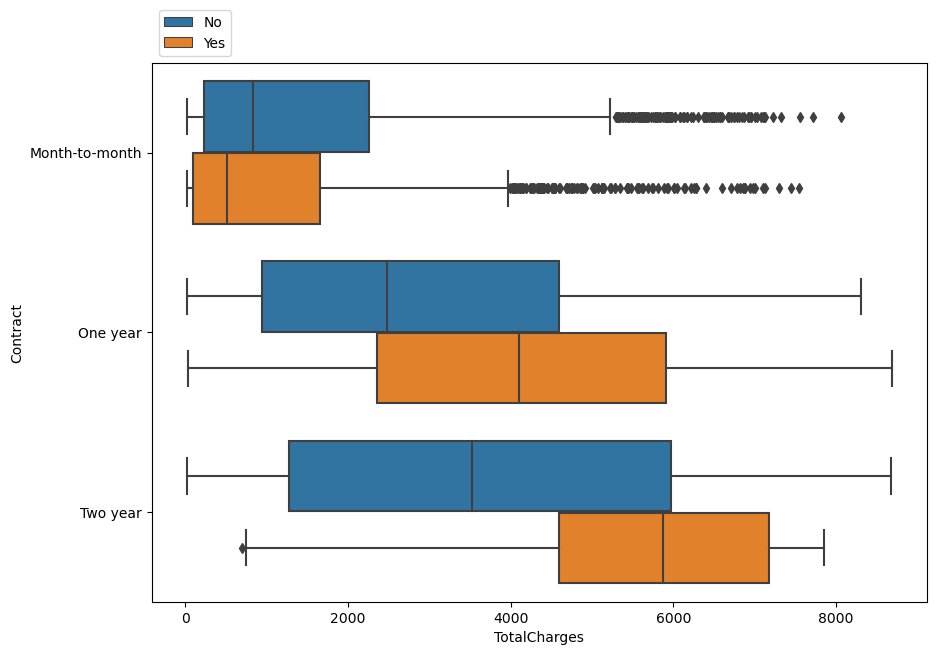

In [11]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='TotalCharges', y='Contract', hue='Churn')
plt.legend(loc='lower left', bbox_to_anchor=(0, 1))
plt.show()

In [86]:
non_dummy_cols = ['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
cols = list(set(df.columns) - set(non_dummy_cols))
df_dummy = pd.get_dummies(df, columns=cols)
df_dummy = df_dummy.set_index('customerID')
df_dummy

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,gender_Female,gender_Male,Partner_No,Partner_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,1,0,0,0,0,1,...,0,0,1,1,0,0,1,0,0,1
5575-GNVDE,0,34,56.95,1889.50,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,1,0
3668-QPYBK,0,2,53.85,108.15,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,1,0
7795-CFOCW,0,45,42.30,1840.75,0,0,1,1,0,0,...,0,1,0,1,0,0,0,1,1,0
9237-HQITU,0,2,70.70,151.65,1,0,0,0,0,1,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,24,84.80,1990.50,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,1
2234-XADUH,0,72,103.20,7362.90,1,0,0,0,1,0,...,0,0,1,0,1,0,1,0,0,1
4801-JZAZL,0,11,29.60,346.45,0,0,1,0,0,1,...,0,0,1,1,0,0,1,0,0,1


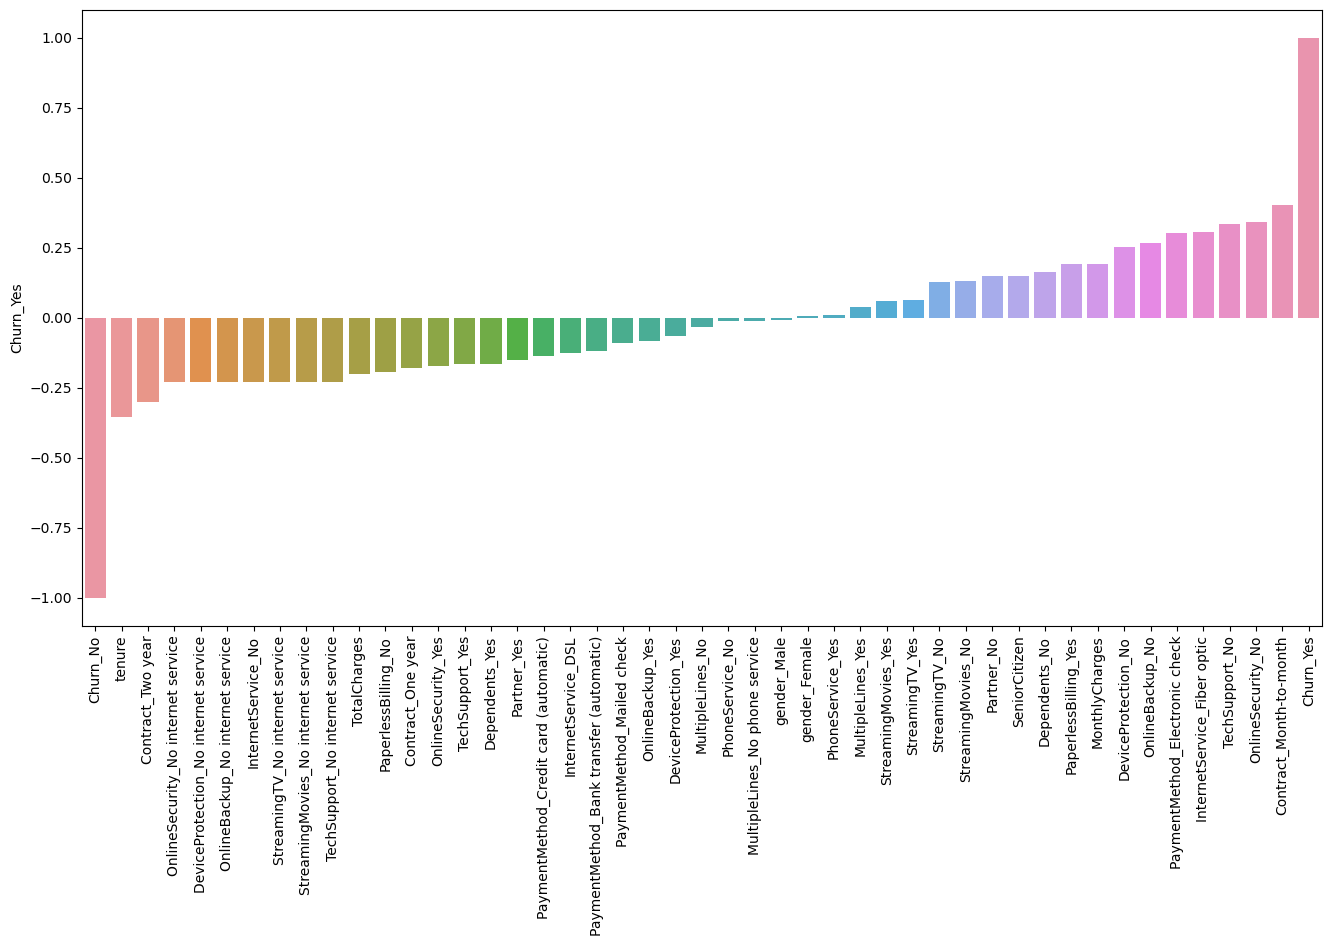

In [108]:
plt.figure(figsize=(16, 8))
correlations = df_dummy.corr().sort_values(by=['Churn_Yes'])
sns.barplot(x=correlations['Churn_Yes'].index, y=correlations['Churn_Yes'])
plt.xticks(rotation=90);
plt.show()